# Customer Churn Prediction using ANN

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading dataset
df = pd.read_csv('Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### EDA & Data Preprocessing

In [3]:
df.shape

(7043, 21)

In [4]:
# to get a view of all columns in dataset
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Dropping customerID column as it is not going to contribute in model
df.drop('customerID', axis = 1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
# pd.to_numeric(df.TotalCharges)

In [12]:
df.iloc[488]['TotalCharges']

' '

In [13]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df1 = df[df.TotalCharges != ' ']
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='Churn', ylabel='count'>

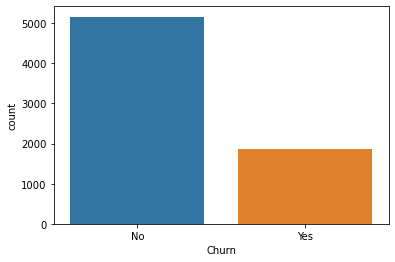

In [17]:
import seaborn as sns
sns.countplot(x = 'Churn', data = df1)

In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

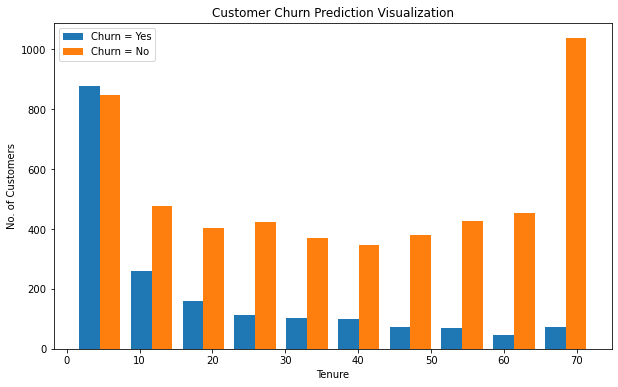

In [19]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure
plt.figure(figsize=[10,6])
plt.xlabel('Tenure')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

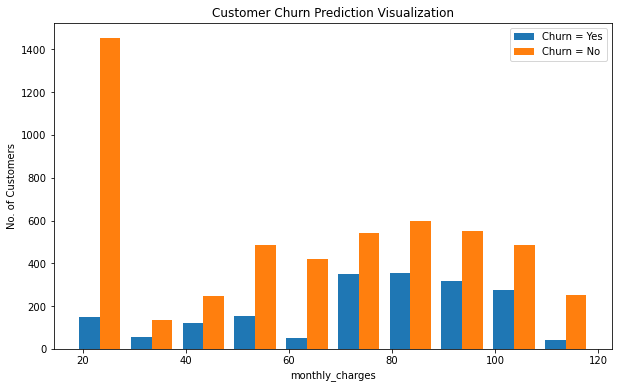

In [20]:
month_charge_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
month_charge_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
plt.figure(figsize=[10,6])
plt.xlabel('monthly_charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([month_charge_churn_yes, month_charge_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

In [21]:
# Getting all the unique values of columns in Dataset

def print_unique_col_values(df):
    for column in df1:
        if df1[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [25]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
yes_no_columns = ['Partner', 'Dependents','PhoneService', 'MultipleLines','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 
                  'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

In [28]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [29]:
df2 = pd.get_dummies(data = df1, columns=['InternetService','Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [34]:
# We will split our data into training data and test data
X = df2.drop('Churn', axis = 1)
y = df2['Churn']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


In [37]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim = 26, activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs = 100, class_weights = weights)
        
    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report :\n", classification_report(y_test, y_preds))

    return y_preds

In [39]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5024 - accuracy: 0.7540: 0s - loss: 0.5198 - accuracy: 
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7890
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8027
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 0s 

In [40]:
y_pred = []
for element in y_preds:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
y_pred[:10]

[1, 0, 0, 1, 0, 1, 0, 1, 0, 1]

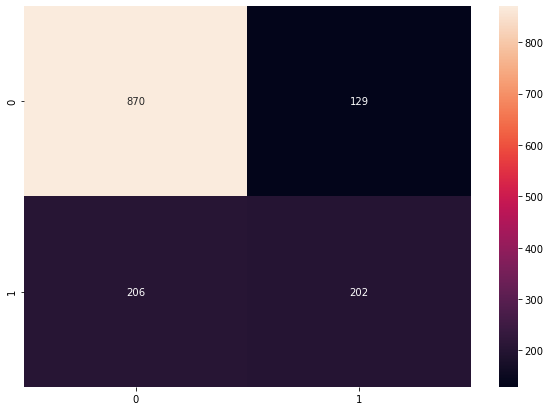

In [42]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel = ("Predicted")
plt.ylabel = ("Truth")

### As our data is imbalanced, we will apply different techniques to make it balanced and try to improve the f1 score for the both the classes and model can predict equally well 

#### 1. Undersampling Method

In [43]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [44]:
# We will divide our target class into 1 and 0 
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [45]:
# class count
count_class_0, count_class_1 = df1.Churn.value_counts()

In [46]:
count_class_0, count_class_1

(5163, 1869)

In [47]:
df_class_0.shape

(5163, 27)

In [48]:
df_class_1.shape

(1869, 27)

In [49]:
# count_class_1 = 1869
df_class_0_under = df_class_0.sample(count_class_1)

In [50]:
# We will concat df_class_0_under and df_class_1 datasets together
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

In [51]:
df_test_under.shape

(3738, 27)

In [52]:
print('Random Under Sampling')
print(df_test_under.Churn.value_counts())

Random Under Sampling
1    1869
0    1869
Name: Churn, dtype: int64


In [53]:
# Splitting data into X & y
X = df_test_under.drop('Churn', axis = 1)
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2990, 26)
(748, 26)
(2990,)
(748,)


In [55]:
# Stratify = y will give you balanced samples for both the classes
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [56]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6013 - accuracy: 0.6957
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.7595
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7696
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7712
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7726
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7753
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7746
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.7793
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7819
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7816
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8107
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8157
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8127
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8137
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8151
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8110
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8161
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8191
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8120
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8151
Epoch 92/100


#### 2. Oversampling

In [57]:
count_class_0, count_class_1

(5163, 1869)

In [58]:
# We will oversample class 1
# replace = True will add duplicate samples in the dataset randomly 
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

In [59]:
df_class_1_over.shape

(5163, 27)

In [60]:
# Concatenating df_class_1_over and df_class_0
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
df_test_over.shape

(10326, 27)

In [61]:
print('Random Over Sampling')
print(df_test_over.Churn.value_counts())

Random Over Sampling
1    5163
0    5163
Name: Churn, dtype: int64


In [62]:
# Splitting data into X & y
X = df_test_over.drop('Churn', axis = 1)
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8260, 26)
(2066, 26)
(8260,)
(2066,)


In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.7071
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4896 - accuracy: 0.7616
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7637
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4781 - accuracy: 0.7708
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.7726
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.7735
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4690 - accuracy: 0.7791
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4650 - accuracy: 0.7810
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7808
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4608 - accura

Epoch 81/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8262
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8263
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8275
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.8288
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8254
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8278
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8301
Epoch 88/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3793 - accuracy: 0.8271
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8303
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3778

#### 3. Synthetic Minority Over Sampling Technique (SMOTE)

In [65]:
X = df2.drop('Churn', axis = 1)
y = df2['Churn']

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [68]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 15, 
                                                    stratify = y_sm)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8260, 26)
(2066, 26)
(8260,)
(2066,)


In [75]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [76]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [77]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7243
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.7798
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.7829
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4532 - accuracy: 0.7850
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4469 - accuracy: 0.7893
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.7961
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4384 - accuracy: 0.7953
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.7972
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8017
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4290 - accura

Epoch 81/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8540
Epoch 82/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8518
Epoch 83/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.8551
Epoch 84/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8538
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8567
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8548
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8567
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8531
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8548
Epoch 90/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3328

#### 4. Using Ensamble with Undersampling

In [78]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [79]:
X = df2.drop('Churn', axis = 1)
y = df2['Churn']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, 
                                                    stratify = y)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 26)
(1407, 26)
(5625,)
(1407,)


In [82]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [83]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [84]:
df3_class_0 = df3[df3.Churn == 0]
df3_class_1 = df3[df3.Churn == 1]

In [85]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)
    
    X_train = df_train.drop('Churn', axis = 1)
    y_train = df_train['Churn']
    
    return X_train, y_train

In [86]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)

y_pred1 =  ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5787 - accuracy: 0.7181
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7595
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7622
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7686
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4754 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7736
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8157
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8104
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8157
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8154
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8134
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8114
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8164
Epoch 90/100
94/94 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.81 - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8151
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8147
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - los

In [87]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)

y_pred2 =  ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5971 - accuracy: 0.6829
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7548
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7649
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7726
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7652
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7689
Epoch 11/

In [88]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2900, 4130)

y_pred3 =  ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
86/86 [==============================] - 1s 2ms/step - loss: 0.6267 - accuracy: 0.6697
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7560
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7593
Epoch 4/100
86/86 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7703
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7714
Epoch 6/100
86/86 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7739
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7772
Epoch 8/100
86/86 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7806
Epoch 9/100
86/86 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.7813
Epoch 10/100
86/86 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7817
Epoch 11/

86/86 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8301
Epoch 84/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8257
Epoch 85/100
86/86 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8308
Epoch 86/100
86/86 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8297
Epoch 87/100
86/86 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8261
Epoch 88/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3801 - accuracy: 0.8283
Epoch 89/100
86/86 [==============================] - 0s 4ms/step - loss: 0.3803 - accuracy: 0.8327
Epoch 90/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8268
Epoch 91/100
86/86 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8305
Epoch 92/100
86/86 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8257
Epoch 93/100


In [89]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] 
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [90]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

